In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set()

In [2]:
# Obtain all the information possible from the csv files.

potential_energy = pd.read_csv('./champs-scalar-coupling/potential_energy.csv')
dipole_moments = pd.read_csv('./champs-scalar-coupling/dipole_moments.csv')
mulliken_charges = pd.read_csv('./champs-scalar-coupling/mulliken_charges.csv')
magnetic_shielding_tensors = pd.read_csv('./champs-scalar-coupling/magnetic_shielding_tensors.csv')
scalar_coupling_contributions = pd.read_csv('./champs-scalar-coupling/scalar_coupling_contributions.csv')
structure = pd.read_csv('./champs-scalar-coupling/structures.csv')

In [3]:
# Make a resume of each of the dataframes

characteristics = [potential_energy, dipole_moments, mulliken_charges, magnetic_shielding_tensors, scalar_coupling_contributions, structure]
for element in characteristics:
    print(element.info())
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 2 columns):
molecule_name       85003 non-null object
potential_energy    85003 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 4 columns):
molecule_name    85003 non-null object
X                85003 non-null float64
Y                85003 non-null float64
Z                85003 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533537 entries, 0 to 1533536
Data columns (total 3 columns):
molecule_name      1533537 non-null object
atom_index         1533537 non-null int64
mulliken_charge    1533537 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533537 entries, 0 to 1533536
Data columns (total 11 columns):
m

In [4]:
# Check out how are the data distributed in each dataframe, see the dimensions to know which to concatenate

for element in characteristics:
    print(element.head())
    print(element.shape[0])
    print('')

      molecule_name  potential_energy
0  dsgdb9nsd_000001         -40.52368
1  dsgdb9nsd_000002         -56.56025
2  dsgdb9nsd_000003         -76.42608
3  dsgdb9nsd_000005         -93.42849
4  dsgdb9nsd_000007         -79.83869
85003

      molecule_name       X    Y       Z
0  dsgdb9nsd_000001  0.0000  0.0  0.0000
1  dsgdb9nsd_000002 -0.0002  0.0  1.6256
2  dsgdb9nsd_000003  0.0000  0.0 -1.8511
3  dsgdb9nsd_000005  0.0000  0.0 -2.8937
4  dsgdb9nsd_000007  0.0000  0.0  0.0000
85003

      molecule_name  atom_index  mulliken_charge
0  dsgdb9nsd_000001           0        -0.535689
1  dsgdb9nsd_000001           1         0.133921
2  dsgdb9nsd_000001           2         0.133922
3  dsgdb9nsd_000001           3         0.133923
4  dsgdb9nsd_000001           4         0.133923
1533537

      molecule_name  atom_index        XX      YX      ZX      XY        YY  \
0  dsgdb9nsd_000001           0  195.3150  0.0000 -0.0001  0.0000  195.3170   
1  dsgdb9nsd_000001           1   31.3410 -1.2317  

In [5]:
# Concatenate potential energy and dipole moments

energy_dipole = pd.concat([potential_energy, dipole_moments],axis=1)
energy_dipole = energy_dipole.loc[:,~energy_dipole.columns.duplicated()]
energy_dipole.head()

,molecule_name,potential_energy,X,Y,Z
0,dsgdb9nsd_000001,-40.52368,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-56.56025,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,-76.42608,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,-93.42849,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,-79.83869,0.0000,0.0,0.0000


In [6]:
# Concatenate mulliken charges and the magnetic shielding tensors

mulliken_magnetic = pd.concat([mulliken_charges, magnetic_shielding_tensors],axis=1)
mulliken_magnetic = mulliken_magnetic.loc[:,~mulliken_magnetic.columns.duplicated()]

In [7]:
# Reduce the size of the structure file in order to have the information for all particles

other_items = set(mulliken_magnetic['molecule_name'].value_counts().index)
all_items = set(structure['molecule_name'].value_counts().index)
compliment = all_items.intersection(other_items)
reduced_structure = structure[structure.molecule_name.isin(compliment)]

In [8]:
# Add more variables to the mulliken_magnetic_structure

mulliken_magnetic_structure = mulliken_magnetic
mulliken_magnetic_structure['atom'] = list(reduced_structure['atom'])
mulliken_magnetic_structure['x'] = list(reduced_structure['x'])
mulliken_magnetic_structure['y'] = list(reduced_structure['y'])
mulliken_magnetic_structure['z'] = list(reduced_structure['z'])

In [9]:
# Add the number of atoms pero particle
energy_dipole['number_of_atoms'] = list(mulliken_magnetic_structure.molecule_name.value_counts().sort_index())

In [10]:
# print dataframes:
mulliken_magnetic_structure.head()

,molecule_name,atom_index,mulliken_charge,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ,atom,x,y,z
0,dsgdb9nsd_000001,0,-0.535689,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,0.133923,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,0.133923,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,-0.523814,1.437933,0.906397


In [11]:
energy_dipole.head()

,molecule_name,potential_energy,X,Y,Z,number_of_atoms
0,dsgdb9nsd_000001,-40.52368,0.0000,0.0,0.0000,5
1,dsgdb9nsd_000002,-56.56025,-0.0002,0.0,1.6256,4
2,dsgdb9nsd_000003,-76.42608,0.0000,0.0,-1.8511,3
3,dsgdb9nsd_000005,-93.42849,0.0000,0.0,-2.8937,3
4,dsgdb9nsd_000007,-79.83869,0.0000,0.0,0.0000,8


In [12]:
energy_dipole.describe().T

,count,mean,std,min,25%,50%,75%,max
potential_energy,85003.0,-410.874055,39.828871,-714.6262,-438.00075,-416.9217,-387.21895,-40.52368
X,85003.0,-0.019937,2.283738,-22.9580,-1.36325,-0.0001,1.31100,21.87380
Y,85003.0,0.093764,1.739395,-9.2523,-0.94195,0.0814,1.16675,13.00560
Z,85003.0,0.252982,1.027573,-6.0285,-0.24775,0.1176,0.90205,6.88010
number_of_atoms,85003.0,18.040975,2.934836,3.0000,16.00000,18.0000,20.00000,29.00000


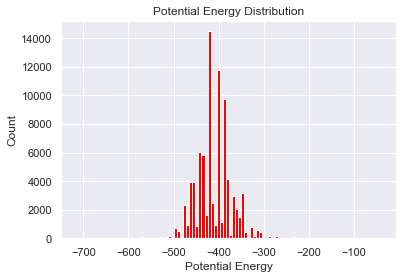

In [15]:
# Show the distributions for each energy and dipole moment

plt.hist(energy_dipole.potential_energy, bins = 100, color='red')
plt.title('Potential Energy Distribution')
plt.xlabel('Potential Energy')
plt.ylabel('Count')
plt.show()

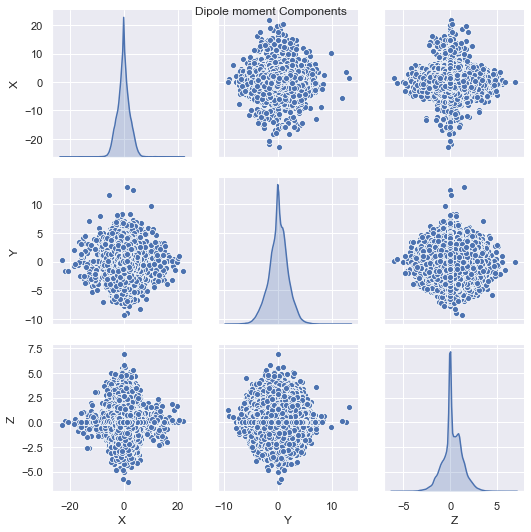

In [14]:
sns.pairplot(energy_dipole[['X','Y','Z']], diag_kind="kde")
plt.suptitle('Dipole moment Components \n')
plt.show()

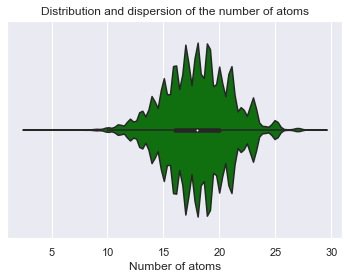

In [16]:
sns.violinplot(energy_dipole.number_of_atoms, showmeans=True, color='Green')
plt.title('Distribution and dispersion of the number of atoms')
plt.xlabel('Number of atoms')
plt.show()

<Figure size 432x288 with 0 Axes>

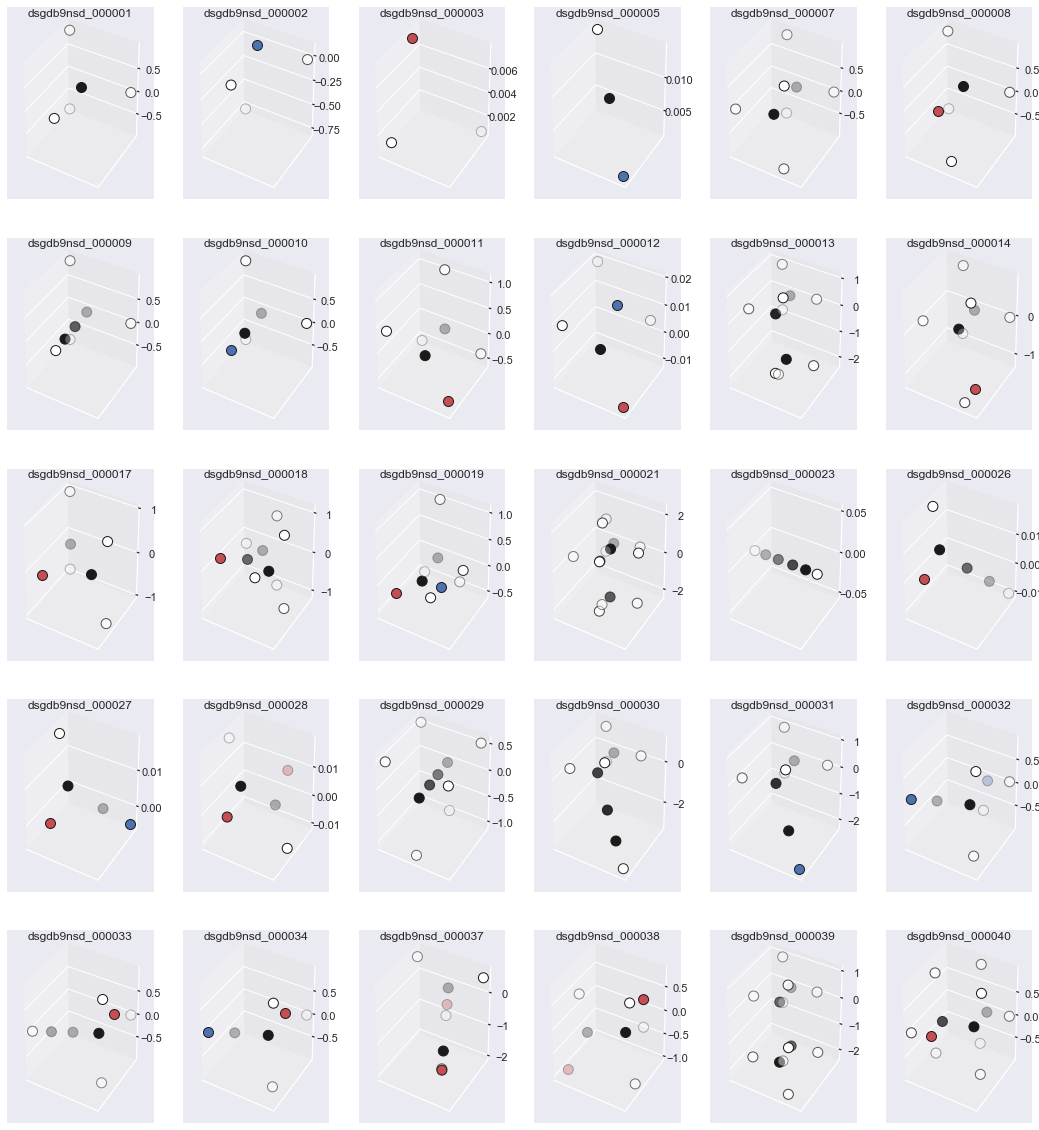

In [56]:
# Shorten the name
mms = mulliken_magnetic_structure
molecule = energy_dipole['molecule_name']
fig = plt.figure()
fig = plt.figure(figsize=plt.figaspect(0.5))

for m_id in range(30):
    ax = fig.add_subplot(5,6,m_id+1, projection='3d')
    ax.scatter(mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'H')]['x'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'H')]['y'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'H')]['z'],
               c='w', s=100, linewidths=1, edgecolors='k')

    ax.scatter(mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'C')]['x'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'C')]['y'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'C')]['z'],
               c='k', s=100, linewidths=1, edgecolors='k')

    ax.scatter(mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'O')]['x'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'O')]['y'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'O')]['z'],
               c='r', s=100, linewidths=1, edgecolors='k')

    ax.scatter(mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'N')]['x'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'N')]['y'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'N')]['z'],
               c='b', s=100,  linewidths=1, edgecolors='k')

    ax.scatter(mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'F')]['x'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'F')]['y'],
               mms[(mms.molecule_name == molecule[m_id])&(mms.atom == 'F')]['z'],
               c='orange', s=100,  linewidths=1, edgecolors='k')
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.title(f'{molecule[m_id]}')
plt.subplots_adjust(left=.02, right=1.8, top=4)

plt.show()